# <span style="color:blueviolet;">Business Objective</span>
##  Customer churn is a concerning problem for large companies (especially in the Telecom field) due to its direct effect on revenues. Companies often seek to know which customers are likely to churn in the recent future so that timely action can be taken to prevent it.

# <span style="color:darkgreen;">Problem Statement</span>

### Build Machine Learning models that predict which customers are likely to churn.

In [83]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
df=os.path.join(r"D:\personal stuff\ANEESH SHARMA\PROFESSIONAL COURSES\HERO VIRED DATA ANALYST\COURSE CIRRICULAM\CAPSTONE PROJECT\Dataset.csv")
ChurnModelling=pd.read_csv(df)
ChurnModelling

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.10,110,89.00,9.87,10.00
1,0,107,1,1,3.70,1,161.60,123,82.00,9.78,13.70
2,0,137,1,0,0.00,0,243.40,114,52.00,6.06,12.20
3,0,84,0,0,0.00,2,299.40,71,57.00,3.10,6.60
4,0,75,0,0,0.00,3,166.70,113,41.00,7.42,10.10
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.20,77,71.70,10.78,9.90
3329,0,68,1,0,0.34,3,231.10,57,56.40,7.67,9.60
3330,0,28,1,0,0.00,2,180.80,109,56.00,14.44,14.10
3331,0,184,0,0,0.00,2,213.80,105,50.00,7.98,5.00


In [84]:
ChurnModelling.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,0.14,101.06,0.90,0.28,0.82,1.56,179.78,100.44,56.31,10.05,10.24
std,0.35,39.82,0.30,0.45,1.27,1.32,54.47,20.07,16.43,2.54,2.79
min,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,14.00,0.00,0.00
25%,0.00,74.00,1.00,0.00,0.00,1.00,143.70,87.00,45.00,8.33,8.50
50%,0.00,101.00,1.00,0.00,0.00,1.00,179.40,101.00,53.50,10.07,10.30
75%,0.00,127.00,1.00,1.00,1.78,2.00,216.40,114.00,66.20,11.77,12.10
max,1.00,243.00,1.00,1.00,5.40,9.00,350.80,165.00,111.30,18.19,20.00


In [103]:
ChurnModelling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Churn                 3333 non-null   int64   
 1   AccountWeeks          3333 non-null   float64 
 2   ContractRenewal       3333 non-null   int64   
 3   DataPlan              3333 non-null   int64   
 4   DataUsage             3333 non-null   float64 
 5   CustServCalls         3333 non-null   float64 
 6   DayMins               3333 non-null   float64 
 7   DayCalls              3333 non-null   float64 
 8   MonthlyCharge         3333 non-null   float64 
 9   OverageFee            3333 non-null   float64 
 10  RoamMins              3333 non-null   float64 
 11  DayMins_PerCall       3331 non-null   float64 
 12  Charge_diff           3333 non-null   float64 
 13  MonthlyUsageCategory  3333 non-null   category
dtypes: category(1), float64(10), int64(3)
memory usage: 342.

In [104]:
ChurnModelling.isna().sum()

Churn                   0
AccountWeeks            0
ContractRenewal         0
DataPlan                0
DataUsage               0
CustServCalls           0
DayMins                 0
DayCalls                0
MonthlyCharge           0
OverageFee              0
RoamMins                0
DayMins_PerCall         2
Charge_diff             0
MonthlyUsageCategory    0
dtype: int64

##  <span style="color:darkviolet;">Analyzing for distribution of all the variables (checking for skewness)</span>

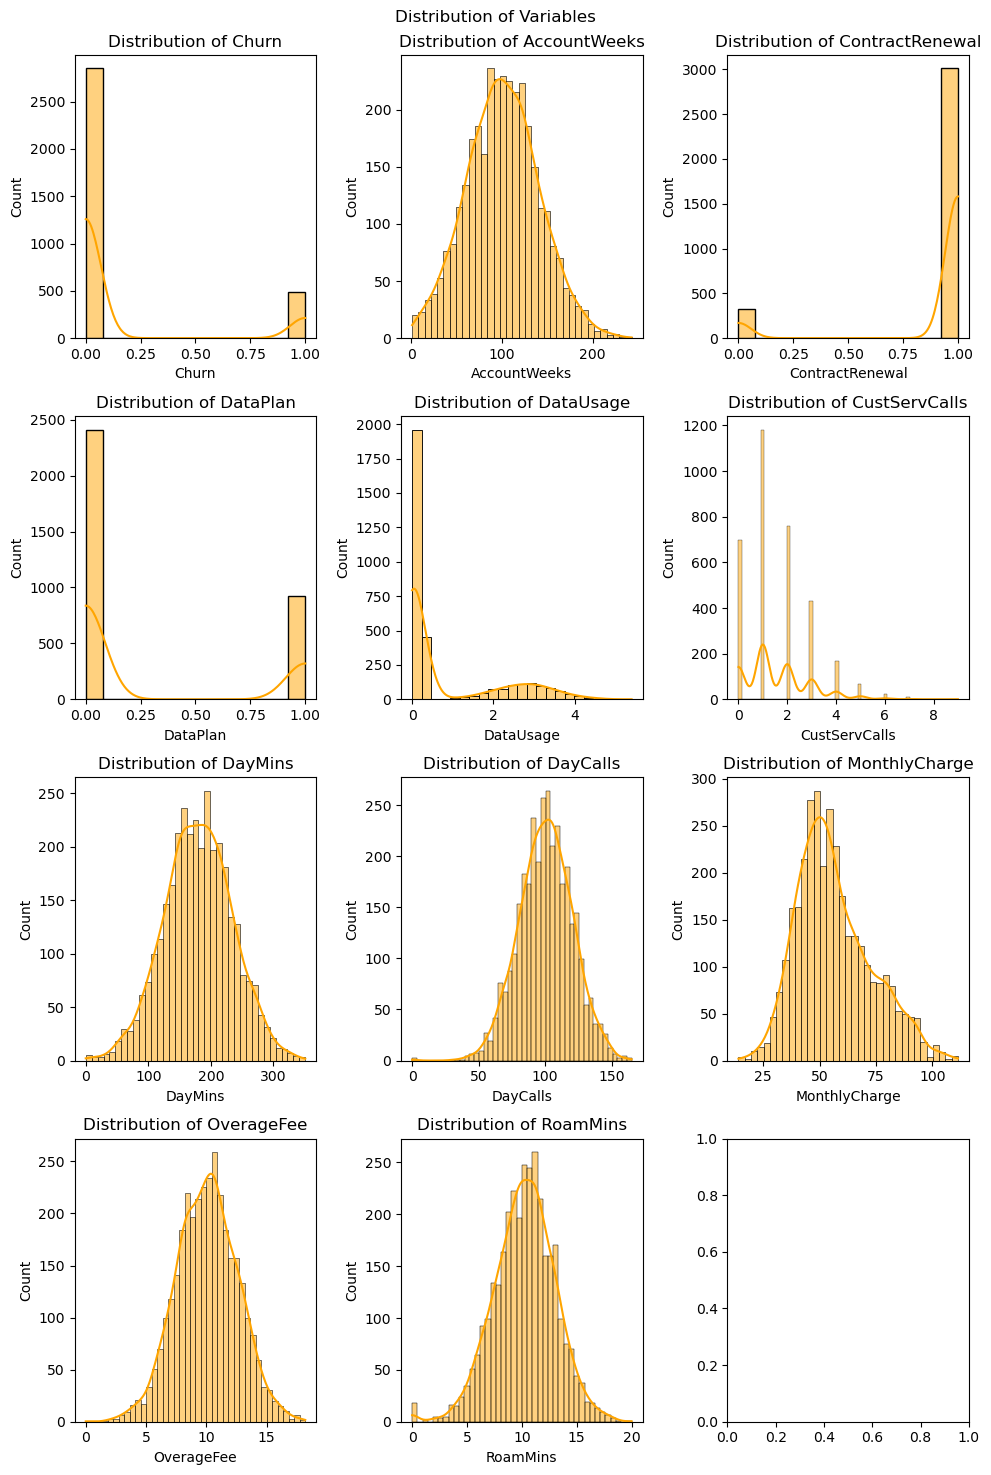

In [85]:
# Calculate the number of rows and columns for the subplots
num_vars = ChurnModelling.shape[1]
num_cols = 3
num_rows = (num_vars + num_cols - 1) // num_cols

# Plot the distribution of all variables
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10, 15))
fig.suptitle('Distribution of Variables')

# List of columns to plot
columns = ChurnModelling.columns

for i, col in enumerate(columns):
    sns.histplot(ChurnModelling[col], ax=axes[i//3, i%3], kde=True,color='orange')
    axes[i//3, i%3].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## The distribution plots for all the variables in the dataset show varying degrees of skewness and kurtosis. Next, we'll perform feature transformations (square, square root, exponential, and log) to achieve a more symmetrical distribution for each variable and then plot the transformed variables.

# <span style="color:darkviolet;">Feature transformation</span>

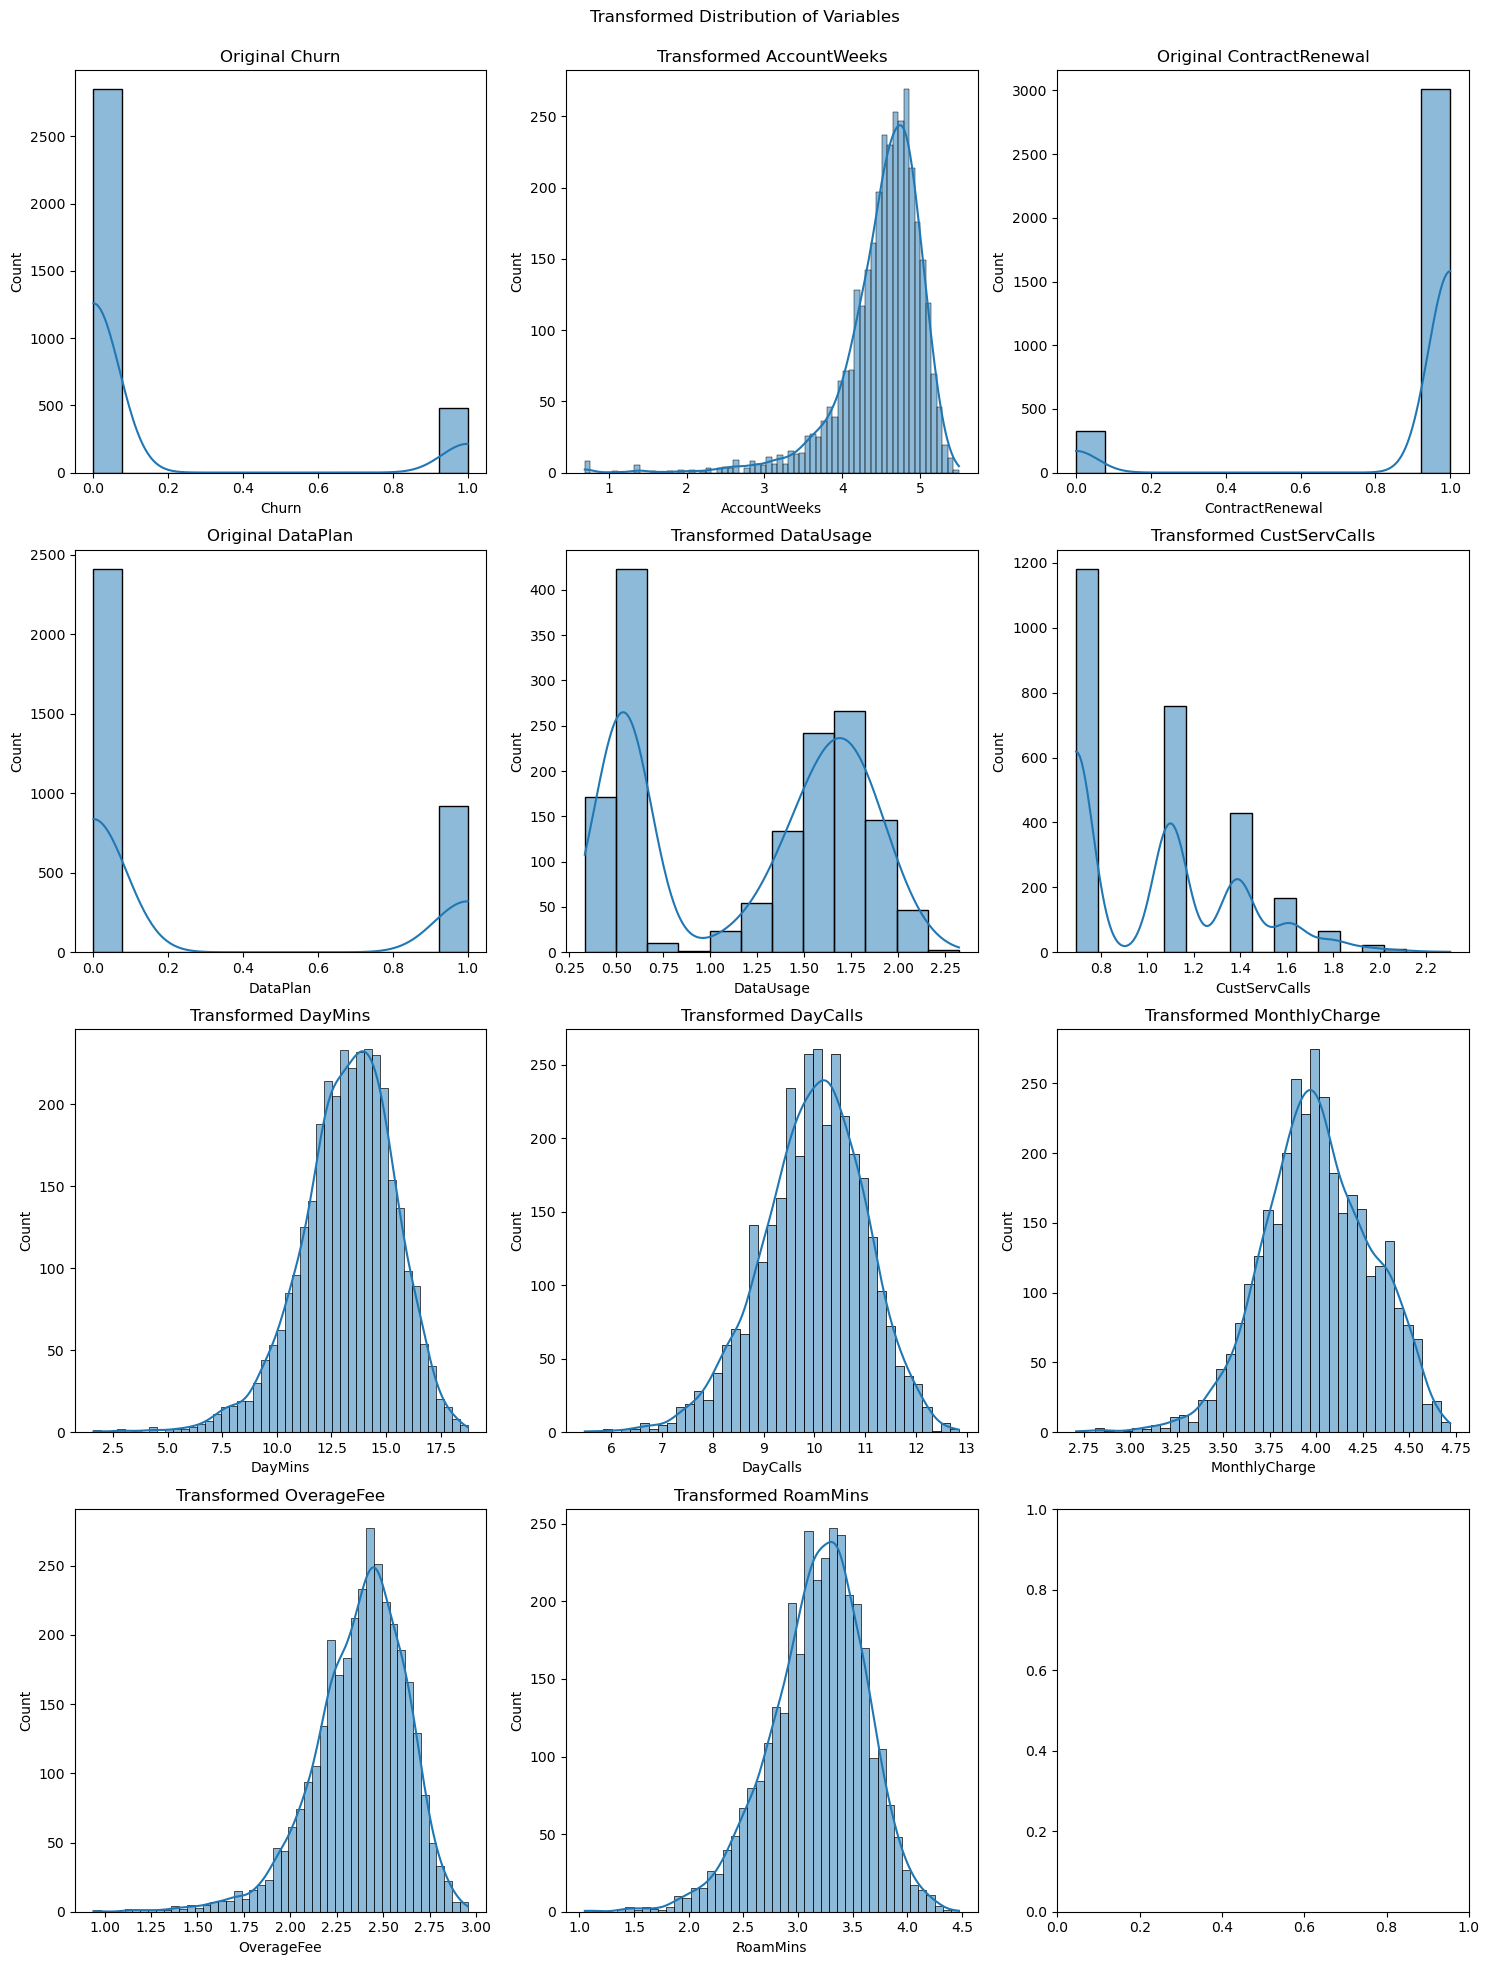

In [86]:
import numpy as np
# Function to apply transformations and plot the distributions
def transform_and_plot(ChurnModelling, transformations):
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 20))
    fig.suptitle('Transformed Distribution of Variables')

    for i, col in enumerate(ChurnModelling.columns):
        if col in transformations:
            transformed_data = transformations[col](ChurnModelling[col].replace(0, np.nan).dropna()) 
            # Replace 0 with NaN for log and sqrt
            sns.histplot(transformed_data, ax=axes[i//3, i%3], kde=True)
            axes[i//3, i%3].set_title(f'Transformed {col}')
        else:
            sns.histplot(ChurnModelling[col], ax=axes[i//3, i%3], kde=True)
            axes[i//3, i%3].set_title(f'Original {col}')

    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Define the transformations for each variable
transformations = {
    'AccountWeeks': np.log1p,
    'DataUsage': np.sqrt,
    'CustServCalls': np.log1p,
    'DayMins': np.sqrt,
    'DayCalls': np.sqrt,
    'MonthlyCharge': np.log1p,
    'OverageFee': np.log1p,
    'RoamMins': np.sqrt
}

# Apply the transformations and plot the results
transform_and_plot(ChurnModelling, transformations)

## The transformed distributions of the variables are plotted. Here's a summary of the transformations applied:
### Log transformation (np.log1p): Applied to AccountWeeks, CustServCalls, MonthlyCharge, and OverageFee.

### Square root transformation (np.sqrt): Applied to DataUsage, DayMins, DayCalls, and RoamMins.

These transformations were chosen to reduce skewness and make the distributions more symmetrical. Some variables still exhibit skewness, indicating that further fine-tuning of transformations may be necessary.

## <span style="color:darkviolet;">Further fine-tuning transformations of variables which are still displaying skewness</span>

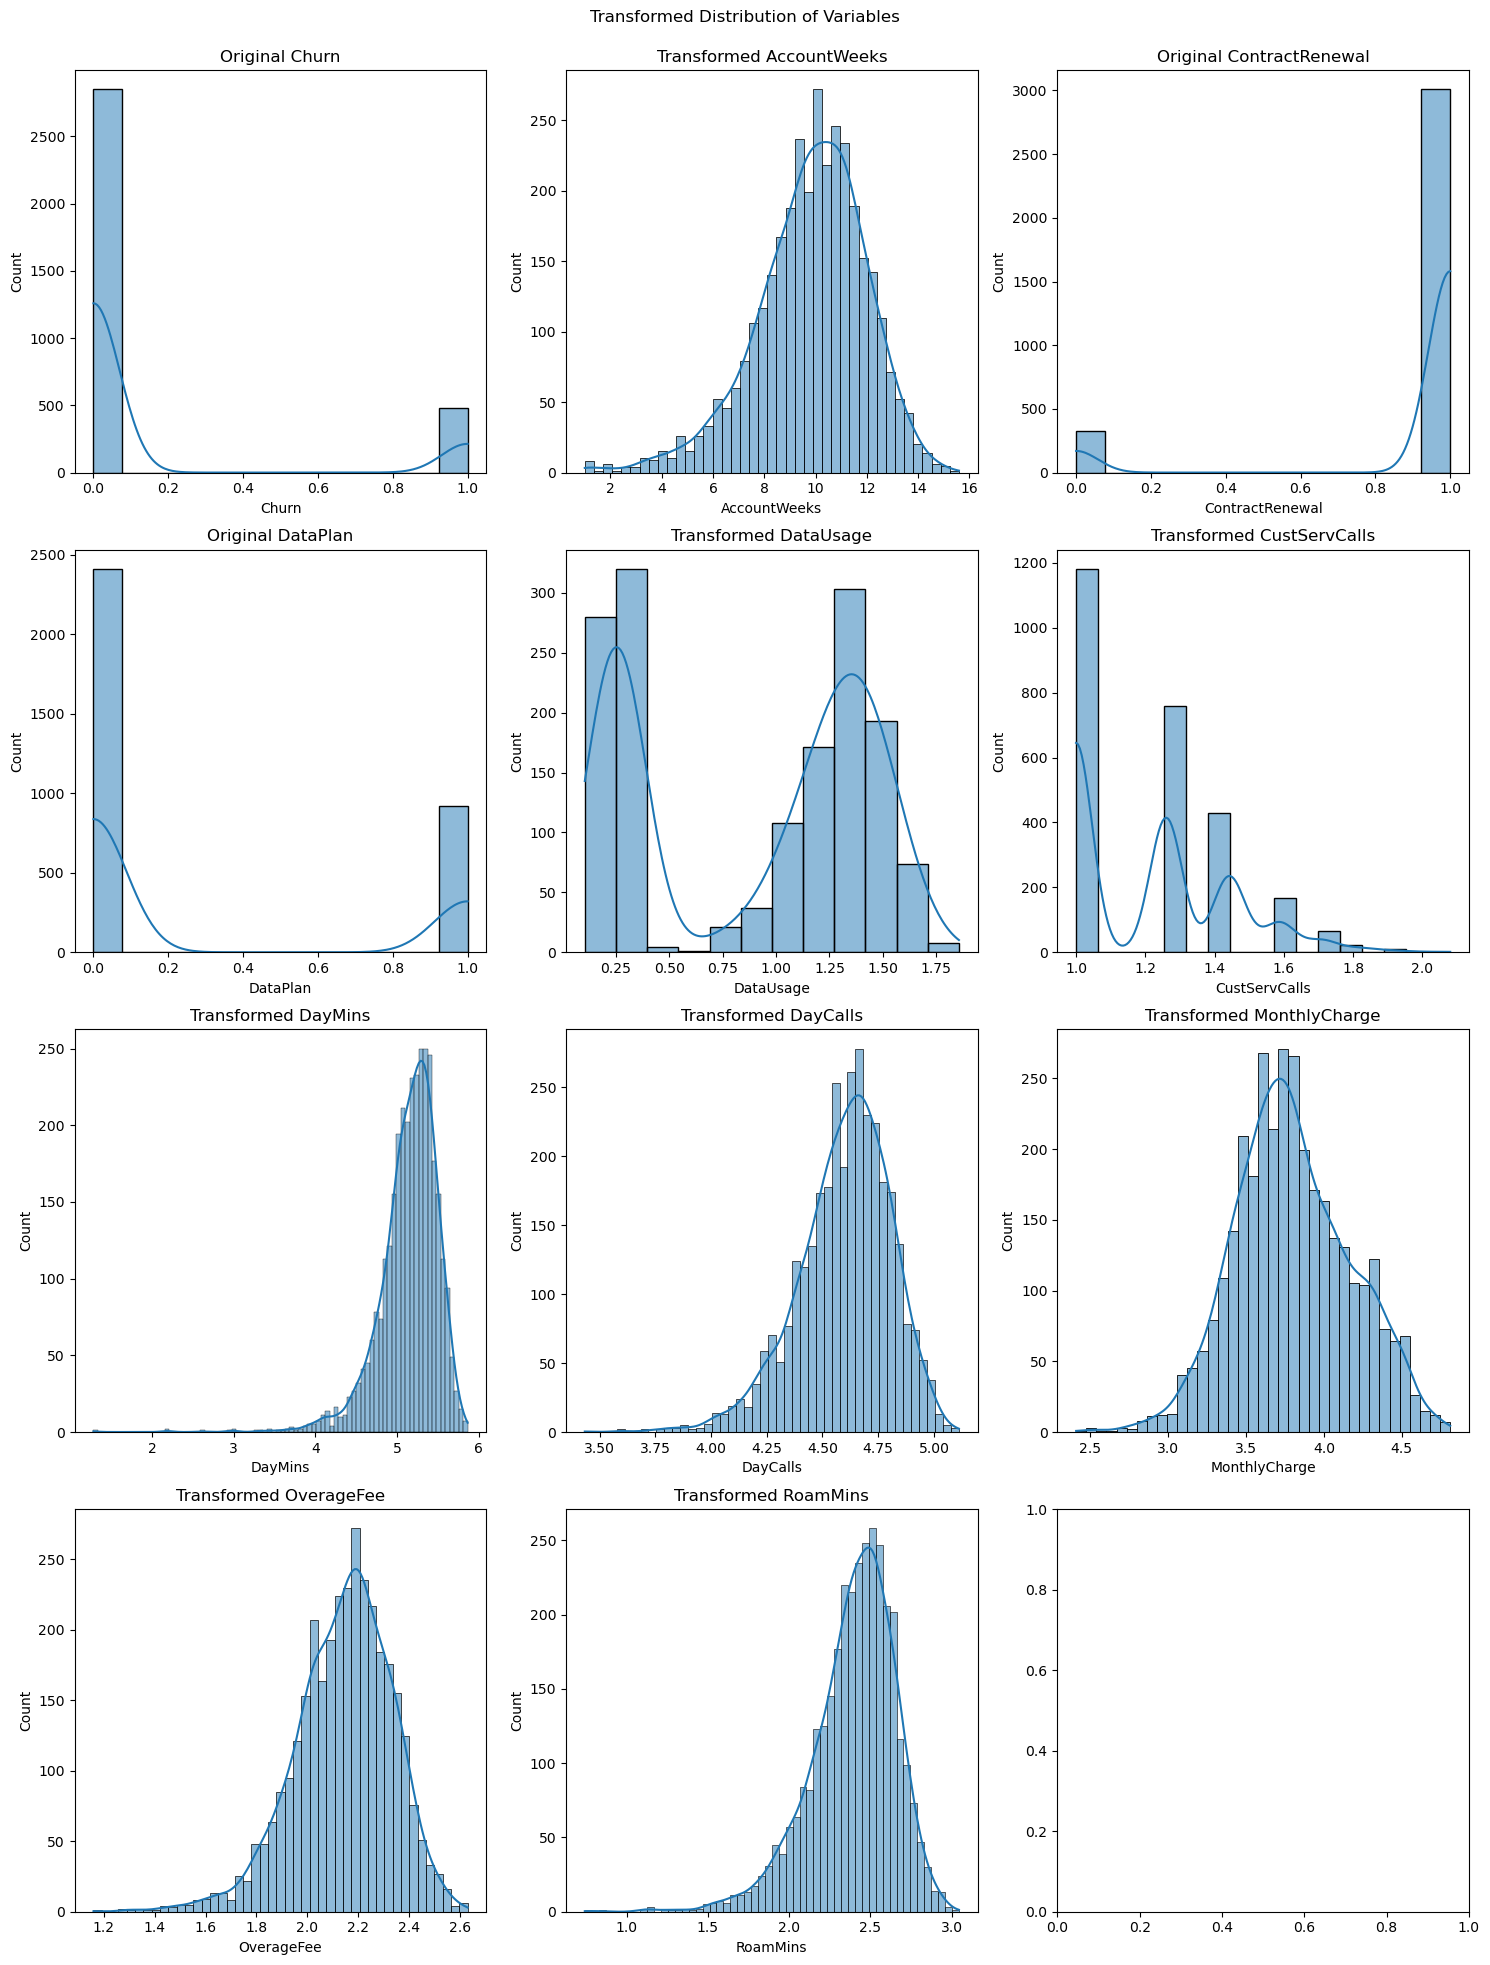

In [87]:
# Identify skewness in the transformed variables
skewness = ChurnModelling[transformations.keys()].apply(lambda x: transformations[x.name](x.replace(0, np.nan).dropna()).skew())
skewed_vars = skewness[abs(skewness) > 0.5].index.tolist()

# Define fine-tuned transformations
fine_tuned_transformations = {
    'AccountWeeks': np.sqrt,
    'CustServCalls': np.cbrt,
    'MonthlyCharge': np.cbrt,
    'OverageFee': np.cbrt,
    'DataUsage': np.log1p,
    'DayMins': np.log1p,
    'DayCalls': np.log1p,
    'RoamMins': np.log1p
}

# Apply fine-tuned transformations and plot the results
transform_and_plot(ChurnModelling, fine_tuned_transformations)

###  Standardizing the features upon feature transformation

In [88]:
# Apply fine-tuned transformations
for col, func in fine_tuned_transformations.items():
    ChurnModelling[col] = ChurnModelling[col].replace(0, np.nan).apply(func).fillna(0)

###  Creating binned variables and Newly derived varibales from transformed variables

In [89]:
# Create new variables
ChurnModelling['DayMins_PerCall'] = ChurnModelling['DayMins'] / ChurnModelling['DayCalls']
ChurnModelling['Charge_diff'] = ChurnModelling['MonthlyCharge'] - ChurnModelling['OverageFee']

# Create binned variable for Monthly Usage
ChurnModelling['MonthlyUsageCategory'] = pd.cut(ChurnModelling['MonthlyCharge'], bins=3, labels=['Low', 'Medium', 'High'])

## <span style="color:darkviolet;">Standardizing the features upon feature transformation</span>

In [90]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
# Standardize the features
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(ChurnModelling.drop(['Churn', 'MonthlyUsageCategory'], axis=1)), columns=ChurnModelling.columns.drop(['Churn', 'MonthlyUsageCategory']))

# Add the target and categorical variable back
data_scaled['Churn'] = ChurnModelling['Churn']
data_scaled['MonthlyUsageCategory'] = ChurnModelling['MonthlyUsageCategory']

# Handle NaN values in the scaled data
data_scaled = data_scaled.fillna(0)

# Print the updated dataset
data_scaled

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,DayMins_PerCall,Charge_diff,Churn,MonthlyUsageCategory
0,0.69,0.33,1.62,1.57,0.08,1.16,0.48,1.81,0.02,0.06,0.68,1.83,0,High
1,0.24,0.33,1.62,1.99,0.08,-0.13,0.94,1.48,-0.01,0.98,-0.67,1.51,0,High
2,0.87,0.33,-0.62,-0.71,-1.80,0.94,0.63,-0.17,-1.64,0.64,0.40,0.70,0,Medium
3,-0.30,-3.05,-0.62,-0.71,0.56,1.48,-1.35,0.14,-3.51,-1.11,2.24,2.02,0,Medium
4,-0.54,-3.05,-0.62,-0.71,0.91,-0.05,0.59,-0.94,-0.98,0.09,-0.41,-0.44,0,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,1.87,0.33,1.62,1.56,0.56,-0.21,-1.01,0.97,0.35,0.03,0.42,0.80,0,High
3329,-0.73,0.33,-0.62,-0.20,0.91,0.80,-2.26,0.10,-0.87,-0.06,2.32,0.57,0,Medium
3330,-2.10,0.33,-0.62,-0.71,0.56,0.17,0.44,0.08,1.51,1.06,-0.14,-0.73,0,Medium
3331,1.74,-3.05,-0.62,-0.71,0.56,0.60,0.28,-0.31,-0.73,-1.87,0.32,0.08,0,Medium


## <span style="color:darkviolet;">Heat Map of Fine tuned transformed variables</span>

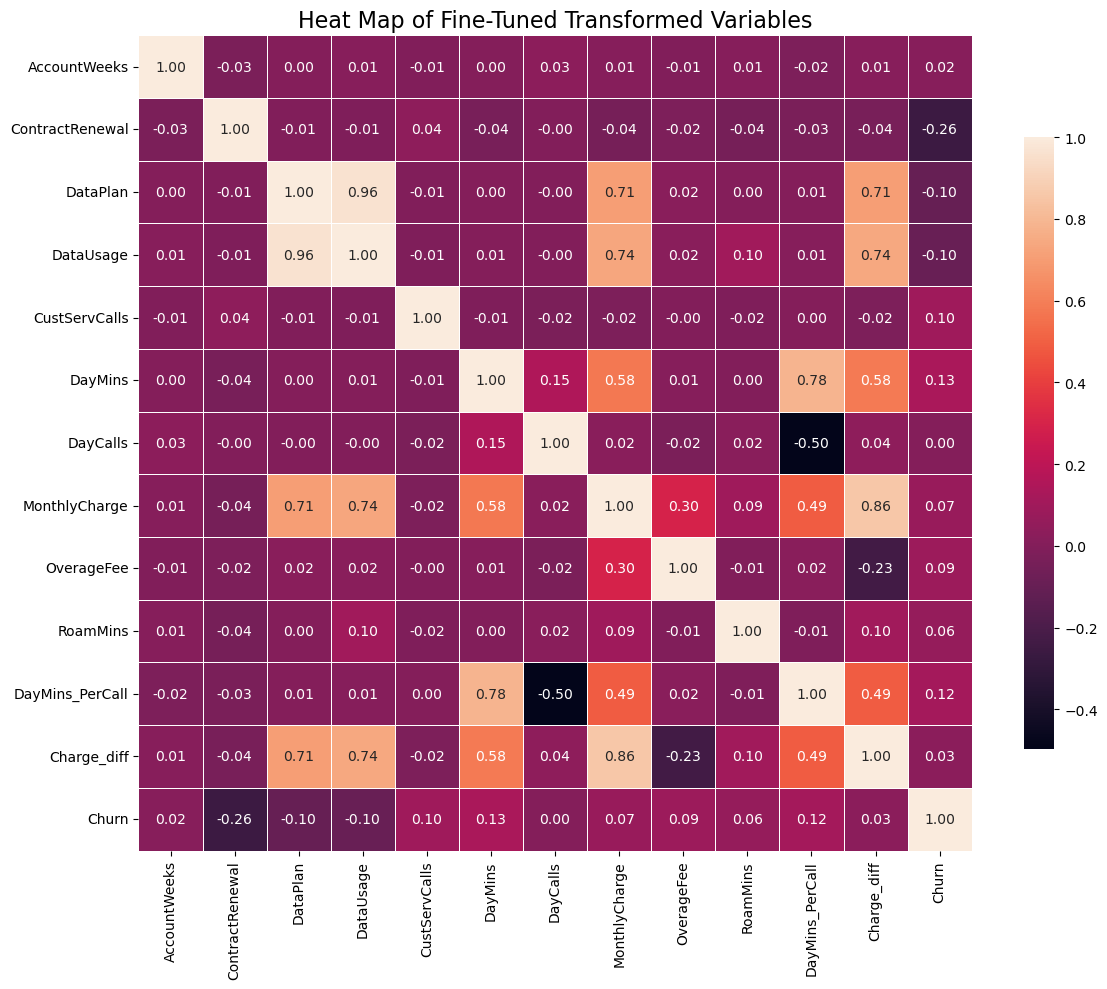

In [91]:
# Compute the correlation matrix
corr_matrix = data_scaled.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the 'viridis' palette
sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'shrink': 0.75})

# Add title and labels
plt.title('Heat Map of Fine-Tuned Transformed Variables', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Display the heatmap
plt.tight_layout()
plt.show()

## <span style="color:darkviolet;">We will convert the categorical variable "MonthlyUsageCategory" to numerical before applying SMOTE</span>

In [92]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variable
label_encoder = LabelEncoder()
data_scaled['MonthlyUsageCategory'] = label_encoder.fit_transform(data_scaled['MonthlyUsageCategory'])

# Separate features and target
X = data_scaled.drop('Churn', axis=1)
y = data_scaled['Churn']

In [93]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## <span style="color:darkviolet;">Build and Evaluate Models</span>

### <span style="color:brown;">Building Different Machine Learning Models(logistic, decision tree,Random Forest,Gardient boosting, kNN, Naive Bayes, Support Vector machine(svm), MLP,XGBoost, AdABoost,Catboost, LGBM and then evaluate them.</span>

In [94]:
pip install lazypredict

In [95]:
!pip install catboost

In [96]:
!pip install shap xgboost lightgbm catboost

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
import pandas as pd

# Function to evaluate models
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    report = classification_report(y, y_pred)
    conf_matrix = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    auc_roc = roc_auc_score(y, y_pred)
    return report, conf_matrix, accuracy, f1, precision, recall, auc_roc

# List to store models and their importances
models = []
importances = []

# Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_resampled, y_resampled)

rfe = RFE(log_reg, n_features_to_select=1)
rfe.fit(X_resampled, y_resampled)

log_reg_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(log_reg.coef_[0])
}).sort_values(by='Importance', ascending=False)
models.append('Logistic Regression')
importances.append(log_reg_importance)

log_reg_report, log_reg_conf_matrix, log_reg_accuracy, log_reg_f1, log_reg_precision, log_reg_recall, log_reg_auc_roc = evaluate_model(log_reg, X_resampled, y_resampled)

# Decision Tree Model
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_resampled, y_resampled)

tree_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': tree.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('Decision Tree')
importances.append(tree_importance)

tree_report, tree_conf_matrix, tree_accuracy, tree_f1, tree_precision, tree_recall, tree_auc_roc = evaluate_model(tree, X_resampled, y_resampled)

# Random Forest Classifier Model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

rf_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('Random Forest')
importances.append(rf_importance)

rf_report, rf_conf_matrix, rf_accuracy, rf_f1, rf_precision, rf_recall, rf_auc_roc = evaluate_model(rf, X_resampled, y_resampled)

# Gradient Boosting Classifier Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_resampled, y_resampled)

gb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': gb.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('Gradient Boosting')
importances.append(gb_importance)

gb_report, gb_conf_matrix, gb_accuracy, gb_f1, gb_precision, gb_recall, gb_auc_roc = evaluate_model(gb, X_resampled, y_resampled)

# K-Nearest Neighbors Classifier Model
knn = KNeighborsClassifier()
knn.fit(X_resampled, y_resampled)

knn_report, knn_conf_matrix, knn_accuracy, knn_f1, knn_precision, knn_recall, knn_auc_roc = evaluate_model(knn, X_resampled, y_resampled)

# Gaussian Naive Bayes Classifier Model
nb = GaussianNB()
nb.fit(X_resampled, y_resampled)

nb_report, nb_conf_matrix, nb_accuracy, nb_f1, nb_precision, nb_recall, nb_auc_roc = evaluate_model(nb, X_resampled, y_resampled)

# Support Vector Classifier Model
svm = SVC(random_state=42)
svm.fit(X_resampled, y_resampled)

svm_report, svm_conf_matrix, svm_accuracy, svm_f1, svm_precision, svm_recall, svm_auc_roc = evaluate_model(svm, X_resampled, y_resampled)

# Multi-Layer Perceptron Classifier Model
mlp = MLPClassifier(random_state=42)
mlp.fit(X_resampled, y_resampled)

mlp_report, mlp_conf_matrix, mlp_accuracy, mlp_f1, mlp_precision, mlp_recall, mlp_auc_roc = evaluate_model(mlp, X_resampled, y_resampled)

# AdaBoost Classifier Model
ada = AdaBoostClassifier(random_state=42)
ada.fit(X_resampled, y_resampled)

ada_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': ada.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('AdaBoost')
importances.append(ada_importance)

ada_report, ada_conf_matrix, ada_accuracy, ada_f1, ada_precision, ada_recall, ada_auc_roc = evaluate_model(ada, X_resampled, y_resampled)

# XGBoost Classifier Model
xgb = XGBClassifier(random_state=42)
xgb.fit(X_resampled, y_resampled)

xgb_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('XGBoost')
importances.append(xgb_importance)

xgb_report, xgb_conf_matrix, xgb_accuracy, xgb_f1, xgb_precision, xgb_recall, xgb_auc_roc = evaluate_model(xgb, X_resampled, y_resampled)

# LightGBM Classifier Model
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_resampled, y_resampled)

lgbm_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('LightGBM')
importances.append(lgbm_importance)

lgbm_report, lgbm_conf_matrix, lgbm_accuracy, lgbm_f1, lgbm_precision, lgbm_recall, lgbm_auc_roc = evaluate_model(lgbm, X_resampled, y_resampled)

# CatBoost Classifier Model
cat = CatBoostClassifier(random_state=42, verbose=0)
cat.fit(X_resampled, y_resampled)

cat_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': cat.feature_importances_
}).sort_values(by='Importance', ascending=False)
models.append('CatBoost')
importances.append(cat_importance)

cat_report, cat_conf_matrix, cat_accuracy, cat_f1, cat_precision, cat_recall, cat_auc_roc = evaluate_model(cat, X_resampled, y_resampled)

# Lazy Classifier
clf = LazyClassifier(random_state=42)
lazy_models, lazy_predictions = clf.fit(X_resampled, X_resampled, y_resampled, y_resampled)

# Create a DataFrame to showcase the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'F1-score', 'Precision', 'Recall', 'AUC-ROC'],
    'Logistic Regression': [log_reg_accuracy, log_reg_f1, log_reg_precision, log_reg_recall, log_reg_auc_roc],
    'Decision Tree': [tree_accuracy, tree_f1, tree_precision, tree_recall, tree_auc_roc],
    'Random Forest': [rf_accuracy, rf_f1, rf_precision, rf_recall, rf_auc_roc],
    'Gradient Boosting': [gb_accuracy, gb_f1, gb_precision, gb_recall, gb_auc_roc],
    'K-Nearest Neighbors': [knn_accuracy, knn_f1, knn_precision, knn_recall, knn_auc_roc],
    'Gaussian Naive Bayes': [nb_accuracy, nb_f1, nb_precision, nb_recall, nb_auc_roc],
    'Support Vector Machine': [svm_accuracy, svm_f1, svm_precision, svm_recall, svm_auc_roc],
    'Multi-Layer Perceptron': [mlp_accuracy, mlp_f1, mlp_precision, mlp_recall, mlp_auc_roc],
    'AdaBoost': [ada_accuracy, ada_f1, ada_precision, ada_recall, ada_auc_roc],
    'XGBoost': [xgb_accuracy, xgb_f1, xgb_precision, xgb_recall, xgb_auc_roc],
    'LightGBM': [lgbm_accuracy, lgbm_f1, lgbm_precision, lgbm_recall, lgbm_auc_roc],
    'CatBoost': [cat_accuracy, cat_f1, cat_precision, cat_recall, cat_auc_roc]
})

metrics_df

[LightGBM] [Info] Number of positive: 2850, number of negative: 2850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 5700, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


 97%|█████████▋| 28/29 [00:43<00:01,  1.57s/it]

[LightGBM] [Info] Number of positive: 2850, number of negative: 2850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.031702 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2565
[LightGBM] [Info] Number of data points in the train set: 5700, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [00:43<00:00,  1.52s/it]


,Metric,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,K-Nearest Neighbors,Gaussian Naive Bayes,Support Vector Machine,Multi-Layer Perceptron,AdaBoost,XGBoost,LightGBM,CatBoost
0,Accuracy,0.76,1.00,1.00,0.94,0.93,0.73,0.87,0.92,0.88,1.00,0.99,0.98
1,F1-score,0.74,1.00,1.00,0.94,0.94,0.70,0.87,0.92,0.88,1.00,0.99,0.98
2,Precision,0.80,1.00,1.00,0.94,0.89,0.78,0.88,0.91,0.90,1.00,0.99,0.99
3,Recall,0.68,1.00,1.00,0.93,0.99,0.64,0.86,0.92,0.86,1.00,0.99,0.97
4,AUC-ROC,0.76,1.00,1.00,0.94,0.93,0.73,0.87,0.92,0.88,1.00,0.99,0.98



Top features for Logistic Regression:
                  Feature  Importance
3              DataUsage        1.70
12  MonthlyUsageCategory        1.24
7          MonthlyCharge        0.71
1        ContractRenewal        0.66
11           Charge_diff        0.65

Top features for Decision Tree:
            Feature  Importance
4    CustServCalls        0.28
5          DayMins        0.17
1  ContractRenewal        0.15
7    MonthlyCharge        0.08
8       OverageFee        0.05

Top features for Random Forest:
            Feature  Importance
4    CustServCalls        0.20
5          DayMins        0.13
7    MonthlyCharge        0.12
1  ContractRenewal        0.10
3        DataUsage        0.07

Top features for Gradient Boosting:
            Feature  Importance
4    CustServCalls        0.36
1  ContractRenewal        0.19
5          DayMins        0.19
7    MonthlyCharge        0.10
3        DataUsage        0.08

Top features for AdaBoost:
          Feature  Importance
4  CustServCalls

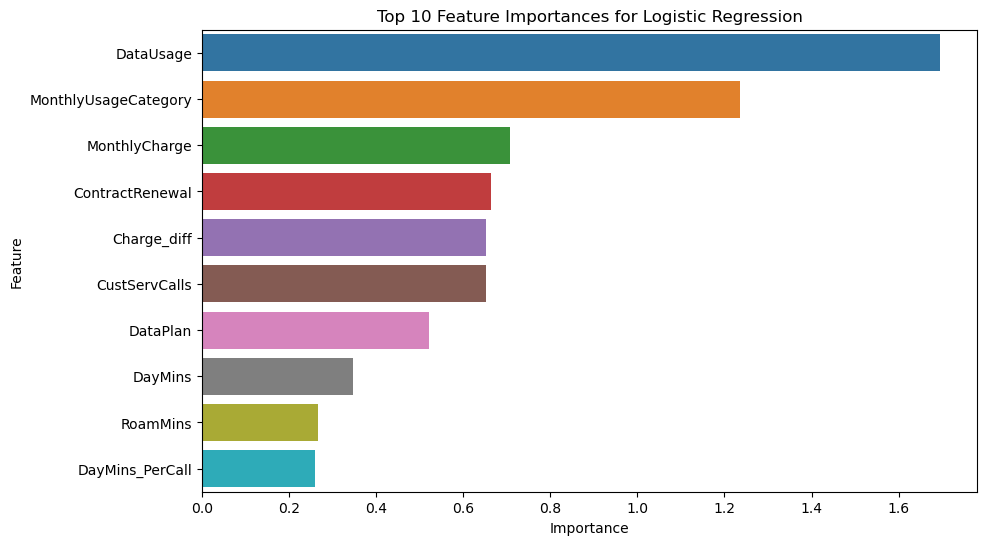

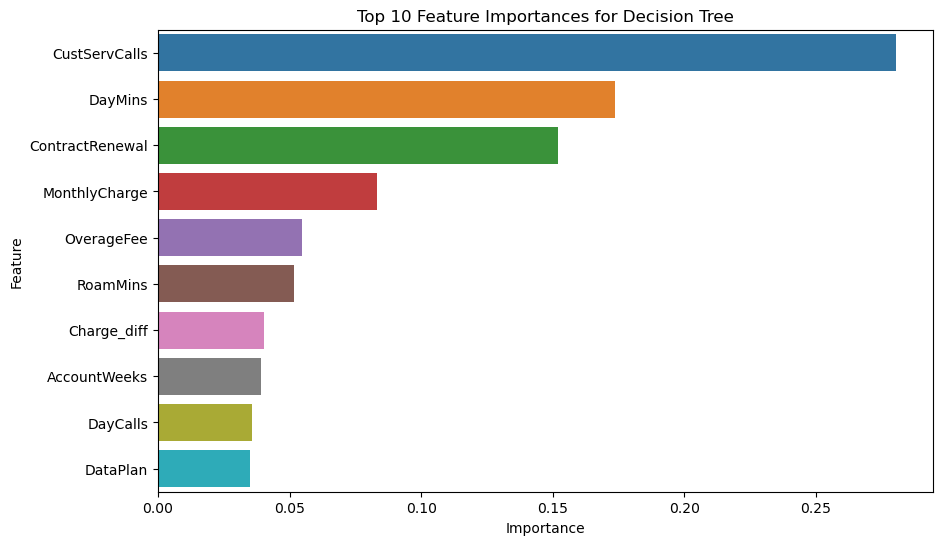

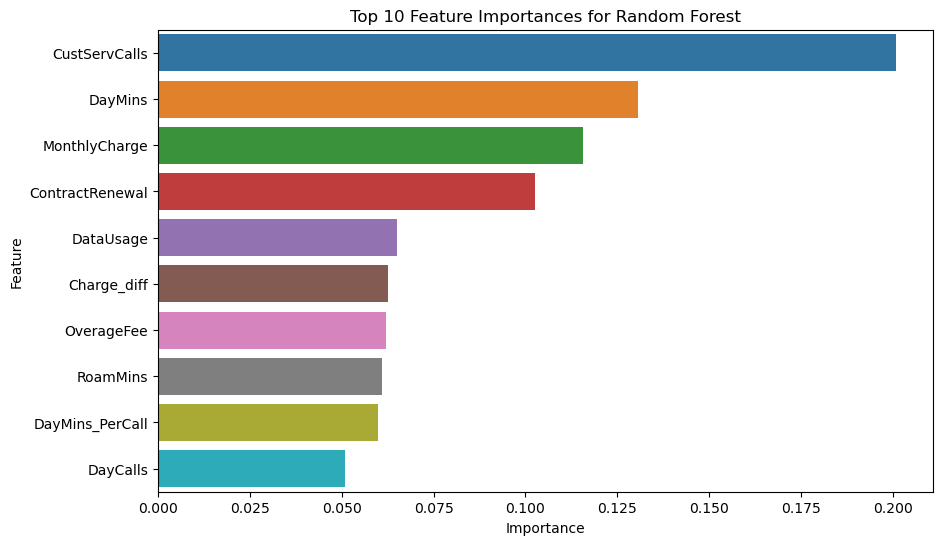

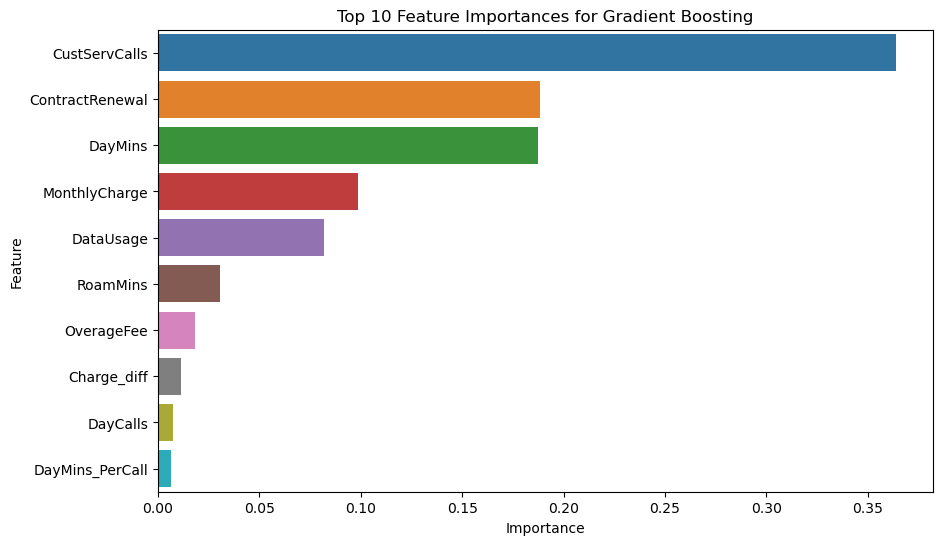

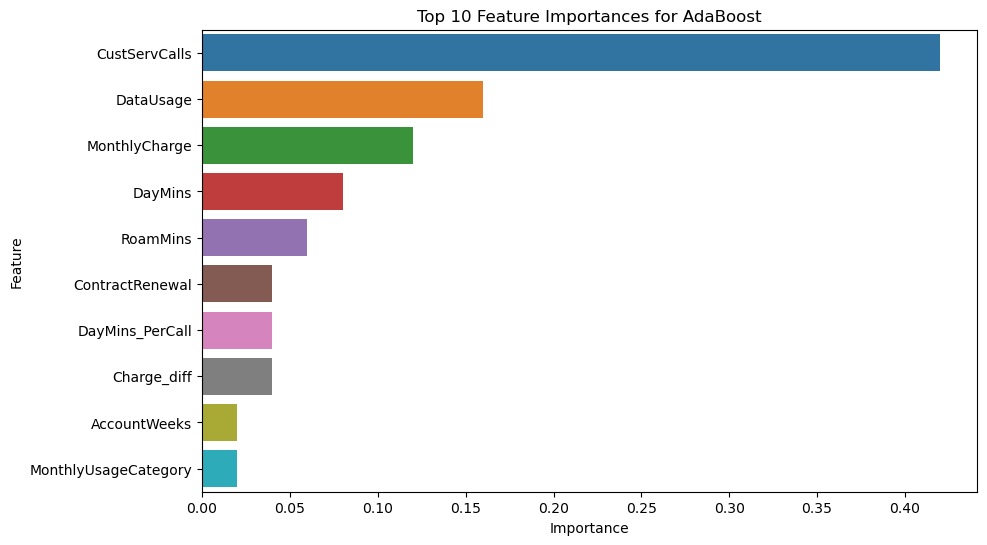

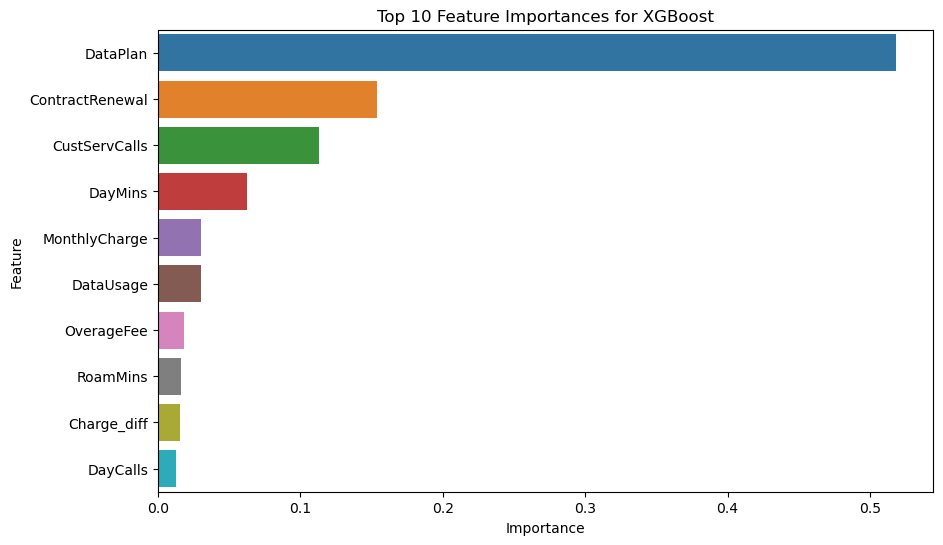

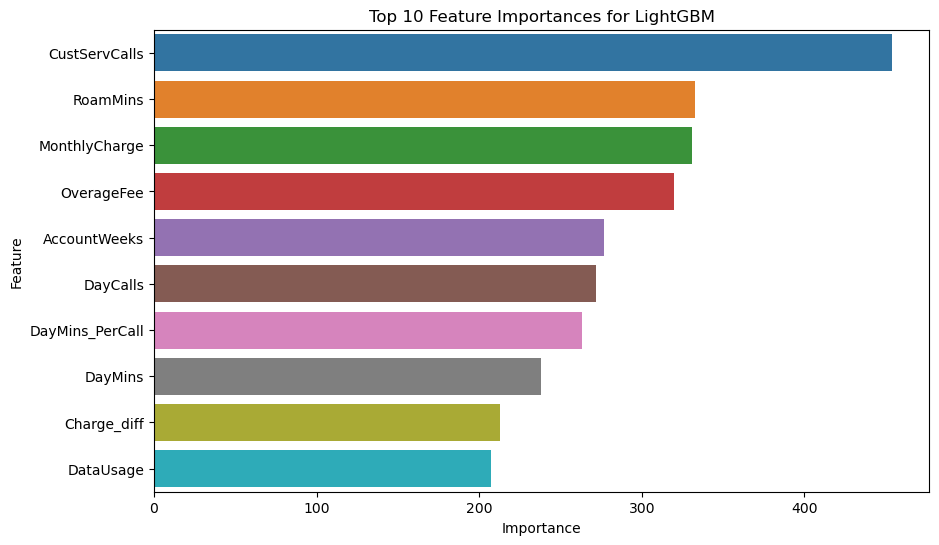

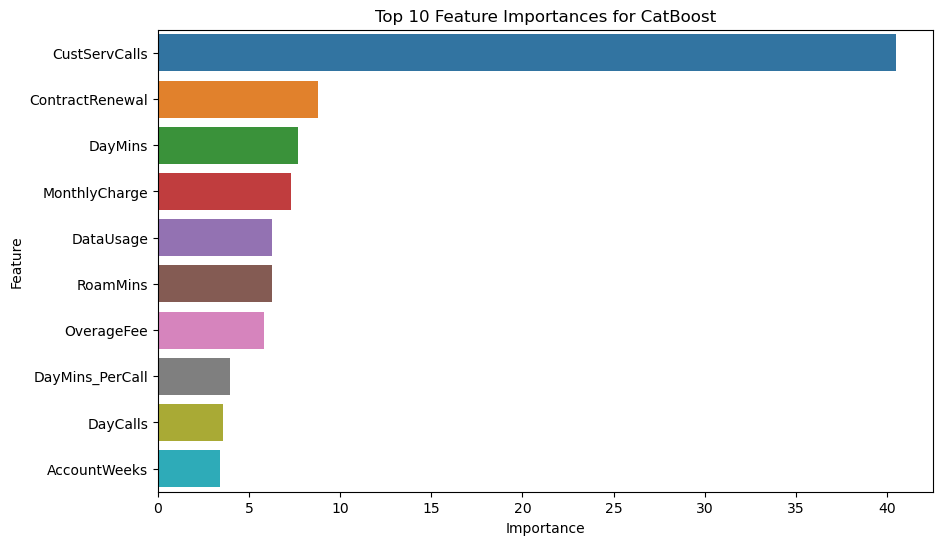

,Metric,Logistic Regression,Decision Tree,Random Forest,Gradient Boosting,K-Nearest Neighbors,Gaussian Naive Bayes,Support Vector Machine,Multi-Layer Perceptron,AdaBoost,XGBoost,LightGBM,CatBoost
0,Accuracy,0.76,1.00,1.00,0.94,0.93,0.73,0.87,0.92,0.88,1.00,0.99,0.98
1,F1-score,0.74,1.00,1.00,0.94,0.94,0.70,0.87,0.92,0.88,1.00,0.99,0.98
2,Precision,0.80,1.00,1.00,0.94,0.89,0.78,0.88,0.91,0.90,1.00,0.99,0.99
3,Recall,0.68,1.00,1.00,0.93,0.99,0.64,0.86,0.92,0.86,1.00,0.99,0.97
4,AUC-ROC,0.76,1.00,1.00,0.94,0.93,0.73,0.87,0.92,0.88,1.00,0.99,0.98


In [98]:
# Displaying the top features for each model in a table format
for model, importance in zip(models, importances):
    print(f"\nTop features for {model}:\n", importance.head())

# Function to plot feature importances
def plot_feature_importances(importance_df, model_name):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
    plt.title(f'Top 10 Feature Importances for {model_name}')
    plt.show()

# Plotting feature importances for all models
for model, importance in zip(models, importances):
    plot_feature_importances(importance, model)

metrics_df

## <span style="color:darkviolet;">Hyper Parameter Tuning using Grid Search</span>

### <span style="color:brown;">Hyperparameter Tuning</span>

### Hyperparameter tuning optimizes the performance of each model by searching for the best combination of parameters using GridSearchCV. This process ensures each model (e.g., Logistic Regression, Decision Tree, Random Forest, etc.) is configured with the most effective parameters to maximize accurac

In [99]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Create a function to perform hyperparameter tuning using GridSearchCV
def perform_grid_search(model, param_grid, X, y):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X, y)
    return grid_search.best_estimator_

# Logistic Regression
log_reg_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs']
}
best_log_reg = perform_grid_search(LogisticRegression(max_iter=1000), log_reg_params, X_resampled, y_resampled)

# Decision Tree
tree_params = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20]
}
best_tree = perform_grid_search(DecisionTreeClassifier(random_state=42), tree_params, X_resampled, y_resampled)

# Random Forest
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10, 20]
}
best_rf = perform_grid_search(RandomForestClassifier(random_state=42), rf_params, X_resampled, y_resampled)

# Gradient Boosting
gb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
best_gb = perform_grid_search(GradientBoostingClassifier(random_state=42), gb_params, X_resampled, y_resampled)

# AdaBoost
ab_params = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1, 1]
}
best_ab = perform_grid_search(AdaBoostClassifier(random_state=42), ab_params, X_resampled, y_resampled)

# XGBoost
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 10]
}
best_xgb = perform_grid_search(xgb.XGBClassifier(random_state=42), xgb_params, X_resampled, y_resampled)

# LightGBM
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [-1, 10, 20]
}
best_lgbm = perform_grid_search(LGBMClassifier(random_state=42), lgbm_params, X_resampled, y_resampled)

# CatBoost
catboost_params = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [3, 6, 10]
}
best_catboost = perform_grid_search(CatBoostClassifier(random_state=42, verbose=0), catboost_params, X_resampled, y_resampled)

# K-Nearest Neighbors
knn_params = {
    'n_neighbors': [5, 10, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
best_knn = perform_grid_search(KNeighborsClassifier(), knn_params, X_resampled, y_resampled)

# Support Vector Classifier
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}
best_svm = perform_grid_search(SVC(random_state=42), svm_params, X_resampled, y_resampled)

# Multi-Layer Perceptron
mlp_params = {
    'hidden_layer_sizes': [(100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001]
}
best_mlp = perform_grid_search(MLPClassifier(random_state=42), mlp_params, X_resampled, y_resampled)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Fitting 5 folds for each of 18 candidates, totalling 90 fits
[LightGBM] [Info] Number of positive: 2850, number of negative: 2850
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2564
[LightGBM] [Info] Number of data points in the train set: 5700, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

## <span style="color:darkviolet;">SHAP (SHapley Additive exPlanations)</span>

### SHAP explains the output of machine learning models by computing the contribution of each feature to the predictions. Using TreeExplainer and KernelExplainer, SHAP values are computed to understand feature importance and visualize how different features impact model predictions.

  0%|          | 0/40 [00:00<?, ?it/s]

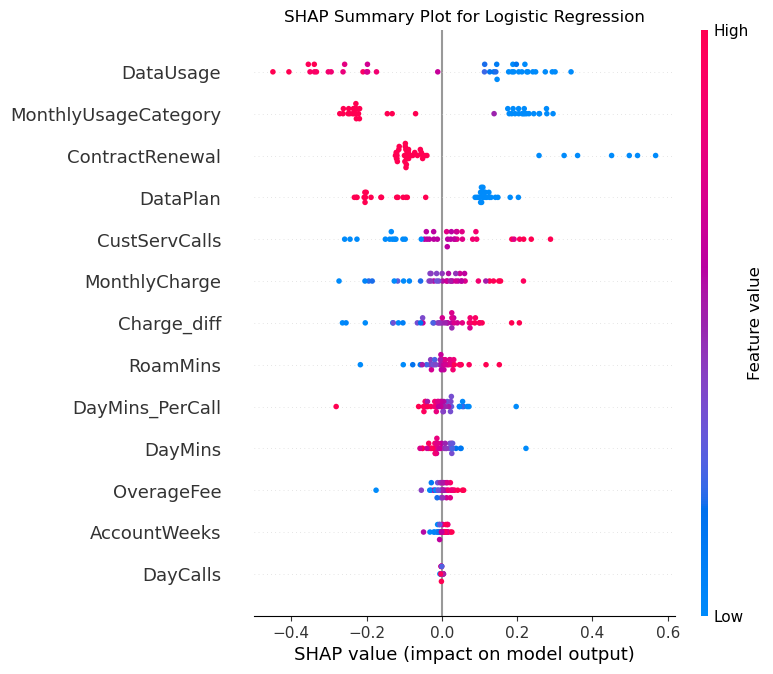

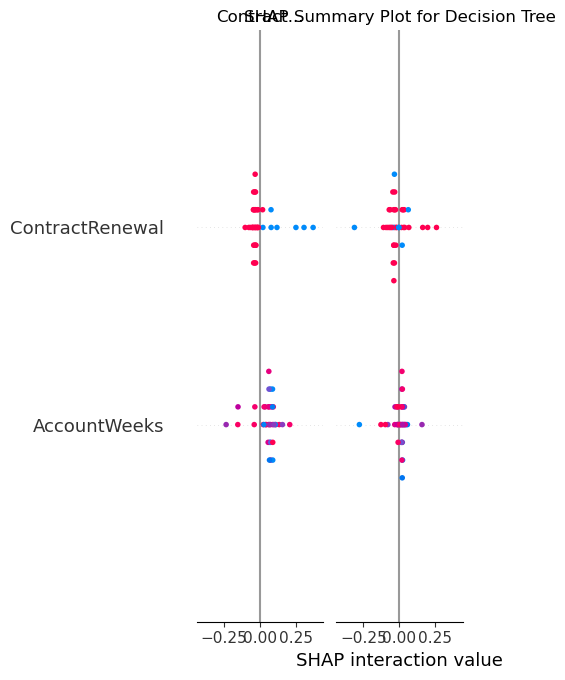

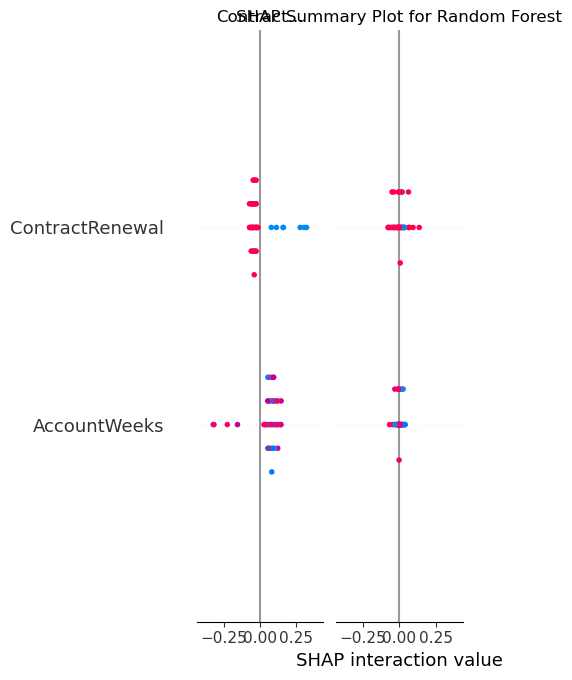

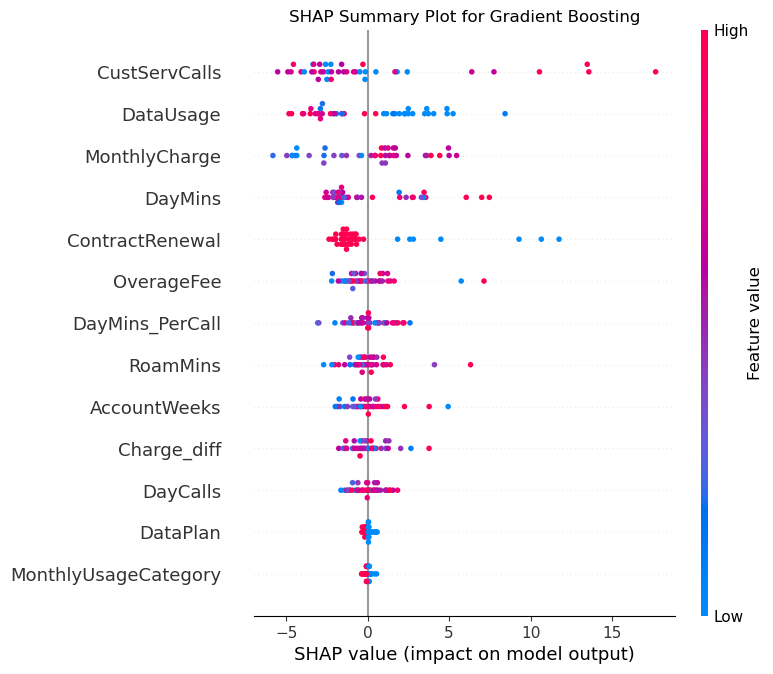

  0%|          | 0/40 [00:00<?, ?it/s]

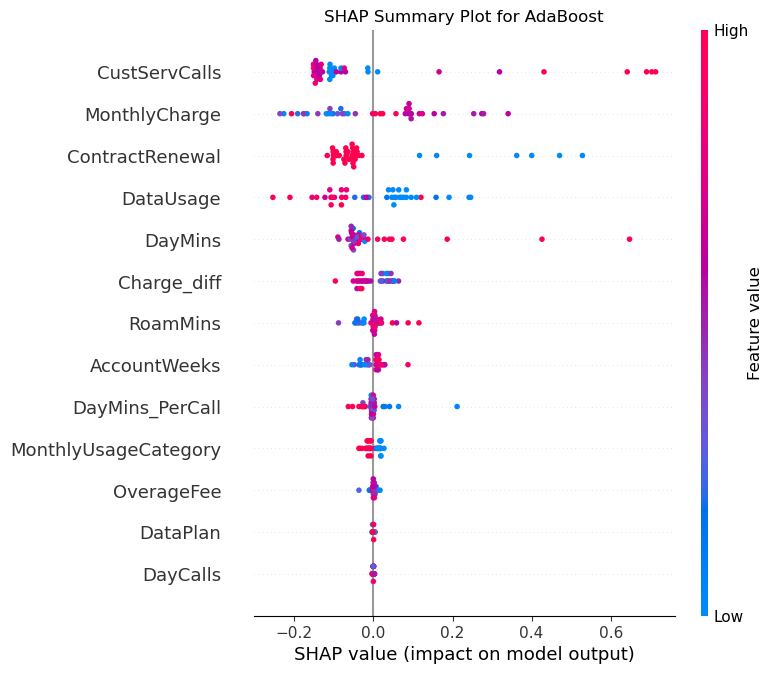

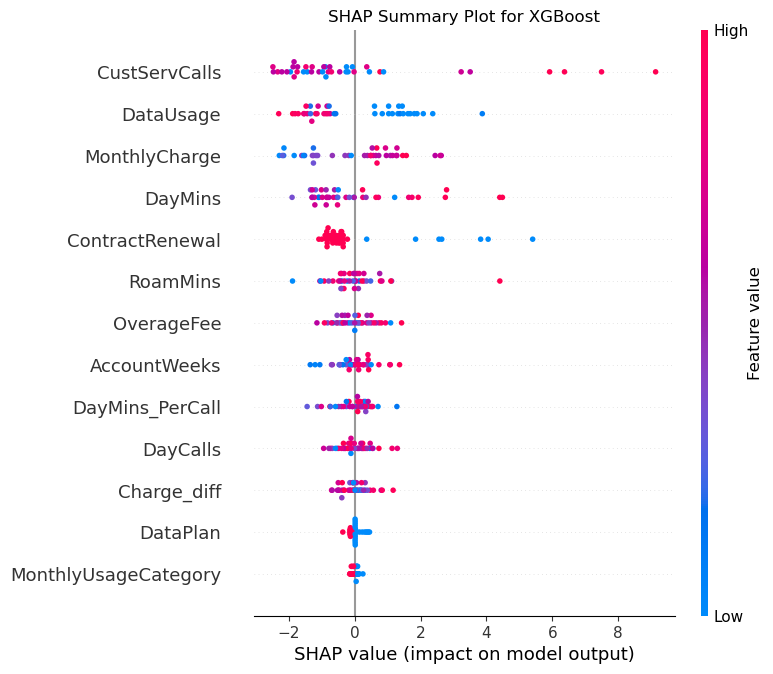

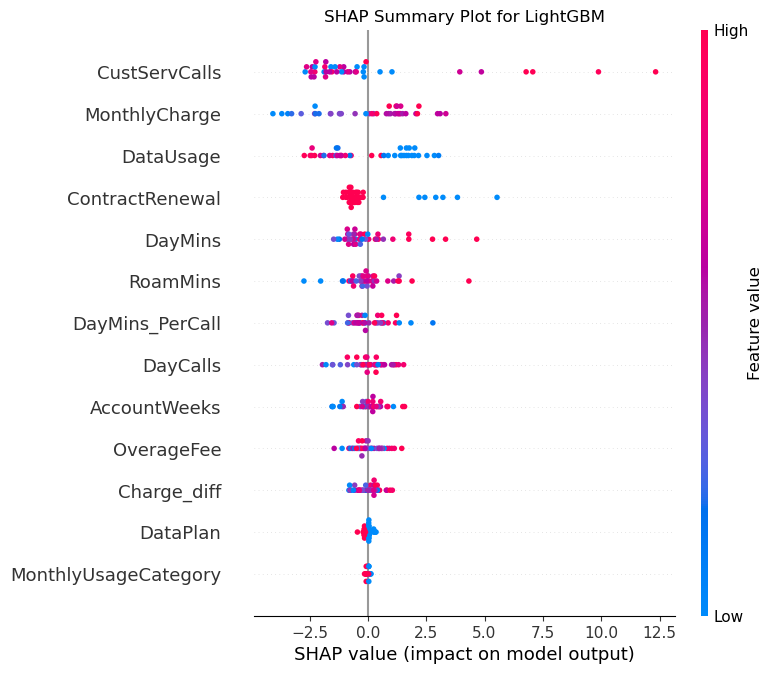

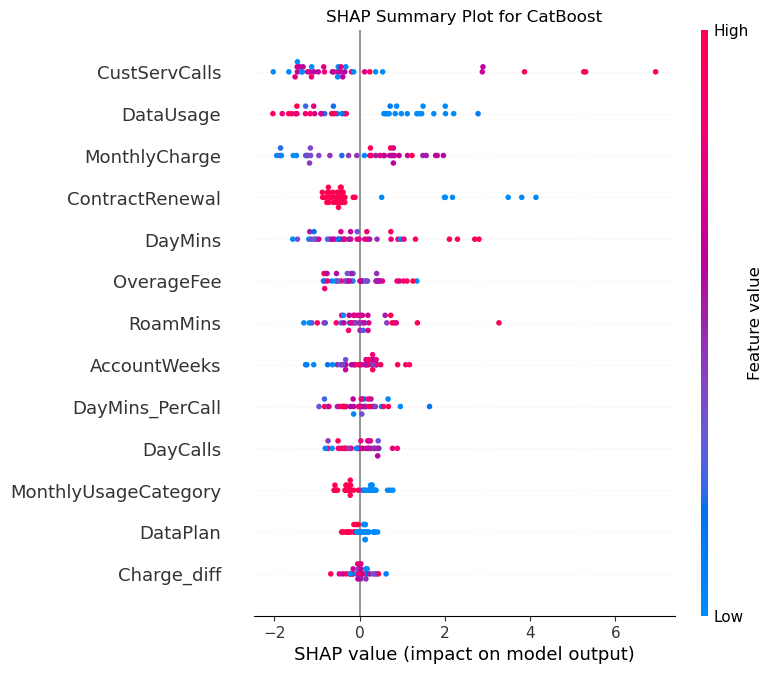

  0%|          | 0/40 [00:00<?, ?it/s]

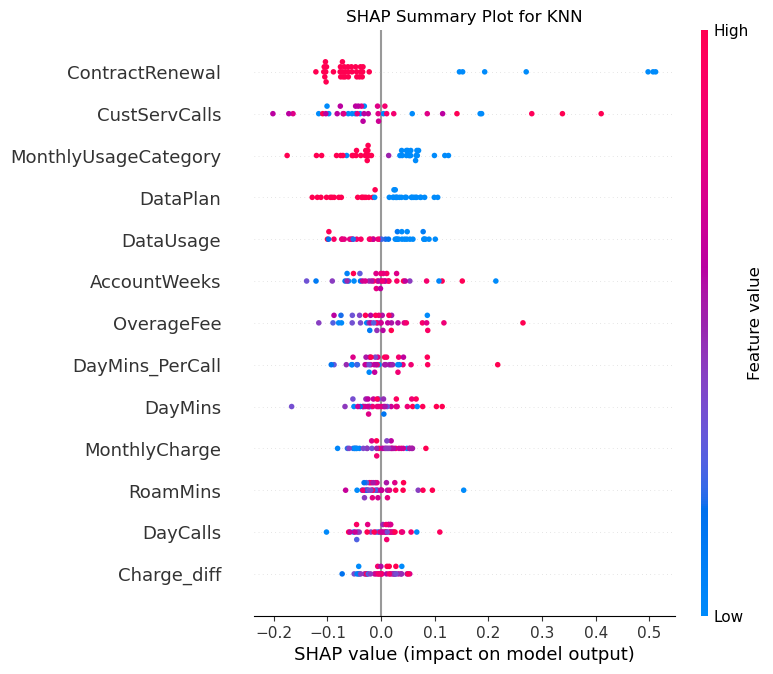

  0%|          | 0/40 [00:00<?, ?it/s]

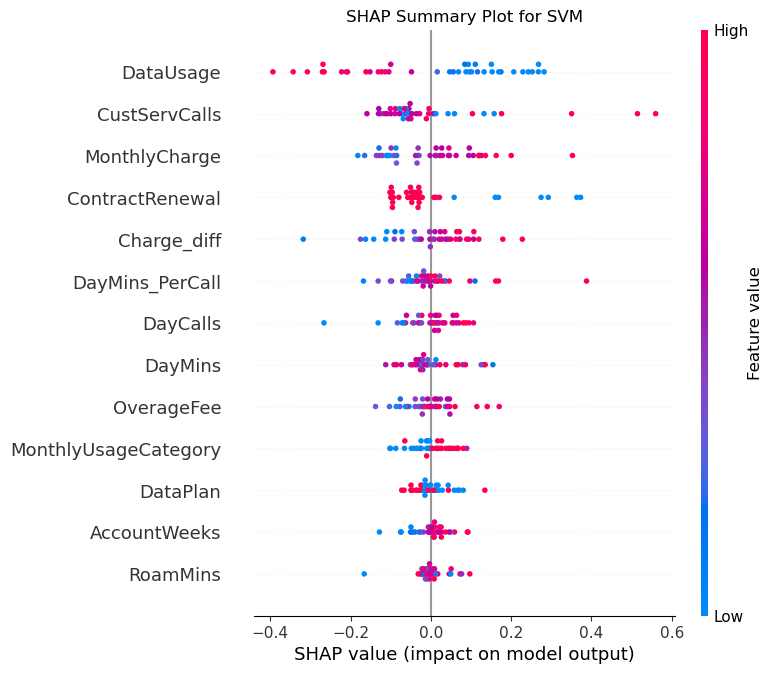

  0%|          | 0/40 [00:00<?, ?it/s]

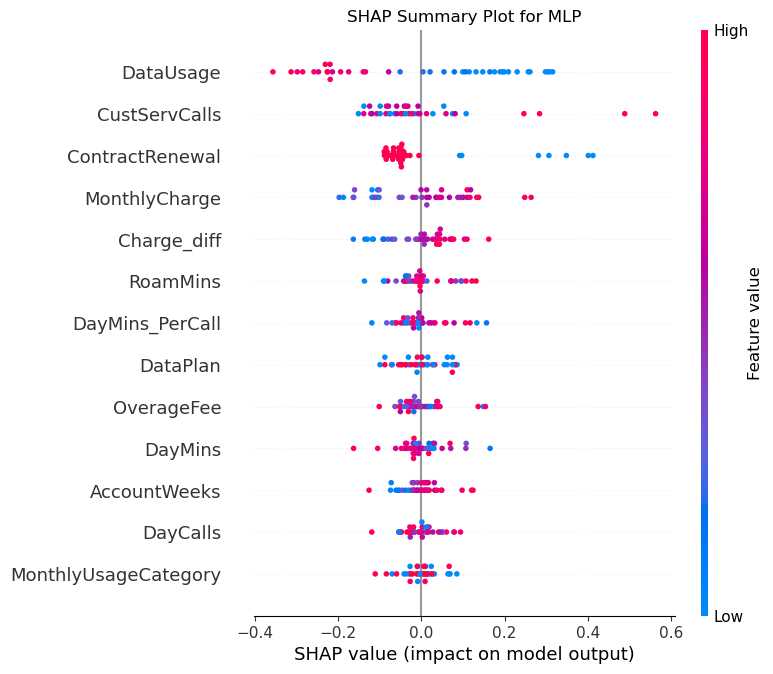

In [100]:
import shap
import matplotlib.pyplot as plt

# `best_models` is a dictionary of the best models obtained from hyperparameter tuning
best_models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': best_tree,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'AdaBoost': best_ab,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm,
    'CatBoost': best_catboost,
    'KNN': best_knn,
    'SVM': best_svm,
    'MLP': best_mlp
}

# Sampling a smaller subset of the dataset for faster computation
sample_size = 40 # Adjust based on your preference for speed vs. accuracy
X_sample = shap.sample(X_resampled, sample_size)

# Computing and visualize SHAP values for each model
for model_name, model in best_models.items():
    if model_name in ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM', 'CatBoost']:
        # Using TreeExplainer for tree-based models
        explainer = shap.TreeExplainer(model, X_sample)
    else:
        # Use KernelExplainer for other models
        explainer = shap.KernelExplainer(model.predict, X_sample)
    
    shap_values = explainer.shap_values(X_sample)
    shap.summary_plot(shap_values, X_sample, feature_names=X_resampled.columns, show=False)
    plt.title(f'SHAP Summary Plot for {model_name}')
    plt.show()

## <span style="color:darkviolet;">Cross-Validation</span>

### Cross-validation evaluates the generalizability of the hyperparameter-tuned models. Using StratifiedKFold, the dataset is split into multiple folds, and each model is trained and tested on these folds to compute the mean accuracy and standard deviation. This process ensures the models perform consistently and reliably across different subsets of the data.

In [101]:
from sklearn.ensemble import RandomForestClassifier as RF

In [102]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Perform cross-validation
def perform_cross_validation(model, X, y, cv=5):
    cv = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy', n_jobs=-1)
    mean_score = np.mean(scores)
    std_score = np.std(scores)
    return mean_score, std_score

# List of models with best estimators from hyperparameter tuning
models = {
    'Logistic Regression': best_log_reg,
    'Decision Tree': best_tree,
    'Random Forest': best_rf,
    'Gradient Boosting': best_gb,
    'AdaBoost': best_ab,
    'XGBoost': best_xgb,
    'LightGBM': best_lgbm,
    'CatBoost': best_catboost,
    'KNN': best_knn,
    'SVM': best_svm,
    'MLP': best_mlp
}

# Perform cross-validation for each model
cv_results = {}
for model_name, model in models.items():
    mean_score, std_score = perform_cross_validation(model, X_resampled, y_resampled, cv=5)
    cv_results[model_name] = {'Mean Accuracy': mean_score, 'Standard Deviation': std_score}

# Display cross-validation results
for model_name, scores in cv_results.items():
    print(f"{model_name}: Mean Accuracy = {scores['Mean Accuracy']:.4f}, Standard Deviation = {scores['Standard Deviation']:.4f}")

Logistic Regression: Mean Accuracy = 0.7588, Standard Deviation = 0.0103
Decision Tree: Mean Accuracy = 0.9040, Standard Deviation = 0.0084
Random Forest: Mean Accuracy = 0.9372, Standard Deviation = 0.0081
Gradient Boosting: Mean Accuracy = 0.9511, Standard Deviation = 0.0073
AdaBoost: Mean Accuracy = 0.8904, Standard Deviation = 0.0062
XGBoost: Mean Accuracy = 0.9519, Standard Deviation = 0.0043
LightGBM: Mean Accuracy = 0.9493, Standard Deviation = 0.0091
CatBoost: Mean Accuracy = 0.9554, Standard Deviation = 0.0081
KNN: Mean Accuracy = 0.9058, Standard Deviation = 0.0030
SVM: Mean Accuracy = 0.8879, Standard Deviation = 0.0057
MLP: Mean Accuracy = 0.9195, Standard Deviation = 0.0054
